<a href="https://colab.research.google.com/github/eduardo-correa/imersao_dados_alura/blob/master/Aula_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Imersão Dados - **Alura**
Primeira aula da 3ª Imersão de Dados Alura - 03/05/2021

Github da imersão [aqui](https://github.com/alura-cursos/imersaodados3).

## Importação de Bibliotecas

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

## Importação dos Dados

In [3]:
url_dados = 'https://github.com/alura-cursos/imersaodados3/blob/main/dados/dados_experimentos.zip?raw=true'
dados = pd.read_csv(url_dados, compression = 'zip')
dados.head()

,id,tratamento,tempo,dose,droga,g-0,g-1,g-2,g-3,g-4,...,c-90,c-91,c-92,c-93,c-94,c-95,c-96,c-97,c-98,c-99
0,id_000644bb2,com_droga,24,D1,b68db1d53,1.0620,0.5577,-0.2479,-0.6208,-0.1944,...,0.2862,0.2584,0.8076,0.5523,-0.1912,0.6584,-0.3981,0.2139,0.3801,0.4176
1,id_000779bfc,com_droga,72,D1,df89a8e5a,0.0743,0.4087,0.2991,0.0604,1.0190,...,-0.4265,0.7543,0.4708,0.0230,0.2957,0.4899,0.1522,0.1241,0.6077,0.7371
2,id_000a6266a,com_droga,48,D1,18bb41b2c,0.6280,0.5817,1.5540,-0.0764,-0.0323,...,-0.7250,-0.6297,0.6103,0.0223,-1.3240,-0.3174,-0.6417,-0.2187,-1.4080,0.6931
3,id_0015fd391,com_droga,48,D1,8c7f86626,-0.5138,-0.2491,-0.2656,0.5288,4.0620,...,-2.0990,-0.6441,-5.6300,-1.3780,-0.8632,-1.2880,-1.6210,-0.8784,-0.3876,-0.8154
4,id_001626bd3,com_droga,72,D2,7cbed3131,-0.3254,-0.4009,0.9700,0.6919,1.4180,...,0.0042,0.0048,0.6670,1.0690,0.5523,-0.3031,0.1094,0.2885,-0.3786,0.7125


### Análise exploratória dos dados

#### Tamanho do dataframe

In [4]:
dados.shape

(23814, 877)

#### A coluna "tratamento"

Se refere aos dois grupos: com_droga (que fez uso da droga) e com_controle (que não fez uso da droga)

In [5]:
dados['tratamento'].unique()

array(['com_droga', 'com_controle'], dtype=object)

In [6]:
dados['tratamento'].value_counts()

com_droga       21948
com_controle     1866
Name: tratamento, dtype: int64

In [7]:
dados['tratamento'].value_counts(normalize = True)

com_droga       0.921643
com_controle    0.078357
Name: tratamento, dtype: float64

<AxesSubplot:ylabel='tratamento'>

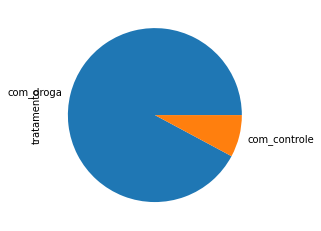

In [8]:
dados['tratamento'].value_counts().plot.pie()

#### A coluna "tempo"

Se refere à quantidade horas passadas da aplicação do medicamento.

In [9]:
dados['tempo'].unique()

array([24, 72, 48], dtype=int64)

In [10]:
dados['tempo'].value_counts()

48    8250
72    7792
24    7772
Name: tempo, dtype: int64

In [11]:
dados['tempo'].value_counts(normalize = True)

48    0.346435
72    0.327202
24    0.326363
Name: tempo, dtype: float64

<AxesSubplot:>

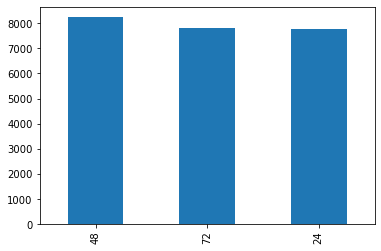

In [12]:
dados['tempo'].value_counts().plot.bar()

#### A coluna "dose"

In [13]:
dados['dose'].unique()

array(['D1', 'D2'], dtype=object)

In [14]:
dados['dose'].value_counts()

D1    12147
D2    11667
Name: dose, dtype: int64

In [15]:
dados['dose'].value_counts(normalize = True)

D1    0.510078
D2    0.489922
Name: dose, dtype: float64

<AxesSubplot:>

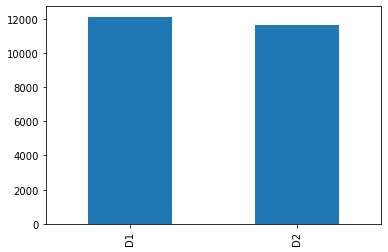

In [16]:
dados['dose'].value_counts().plot.bar()

#### A coluna "droga"

Traz uma identificação anonimizada da droga utilizada

In [17]:
dados['droga'].unique()

array(['b68db1d53', 'df89a8e5a', '18bb41b2c', ..., '573c787a2',
       'b2fe3eca7', 'dd4a96d16'], dtype=object)

In [18]:
dados['droga'].value_counts()

cacb2b860    1866
87d714366     718
9f80f3f77     246
8b87a7a83     203
5628cb3ee     202
             ... 
1d39c75d6       1
379302187       1
7179d2160       1
209a68d23       1
44bba684f       1
Name: droga, Length: 3289, dtype: int64

#### A coluna "g-X"


 Onde X é um número, representa uma expressão de um gene.

## Desafios

### Desafio 01: Investigar por que a classe tratamento é tão desbalanceada?

Como visto na análise exploratória de dados, cerca de 92% dos experimentos utilizaram drogas, enquanto que cerca de 8% não as empregou, visto ser o grupo controle.

In [19]:
dados['tratamento'].value_counts(normalize = True).mul(100).round(1).astype(str) + '%'

com_droga       92.2%
com_controle     7.8%
Name: tratamento, dtype: object

Foram utilizadas diversas drogas diferentes no grupo "com_droga"

In [20]:
dados.query('tratamento == "com_droga"')['droga'].nunique()

3288

E apenas uma 1 no grupo "com_controle", aqui cabe uma suposição que se trate de um placebo.

In [21]:
dados.query('tratamento == "com_controle"')['droga'].nunique()

1

Verificamos qual droga foi utilizada no grupo controle

In [22]:
dados.query('tratamento == "com_controle"')['droga'].value_counts()

cacb2b860    1866
Name: droga, dtype: int64

Verificamos se esta droga também foi utilizada no grupo "com_droga"

In [23]:
dados.query('tratamento == "com_droga" & droga == "cacb2b860"')['droga'].value_counts()

Series([], Name: droga, dtype: int64)

Como esta droga (*cacb2b860*), foi utilizada apenas com o grupo controle, podemos compará-la com as demais drogas.

<AxesSubplot:>

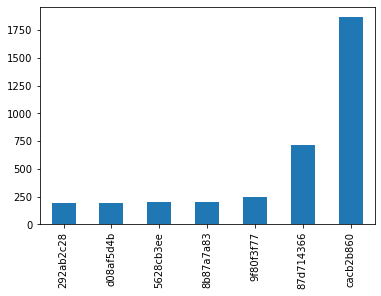

In [24]:
dados['droga'].value_counts().sort_values().tail(7).plot.bar()

Deste modo, como a quantidade de uso do grupo controle é muito superior ao uso das demais drogas, percebe-se que este grupo foi utilizado como comparação com mais, senão todos, outros grupos de drogas aplicadas. Mas isso necessita de mais informações sobre os procedimentos adotados para se ter uma afirmação mais definitiva.

### Desafio 02: Plotar as 5 últimas linhas da tabela

In [25]:
dados.tail()

,id,tratamento,tempo,dose,droga,g-0,g-1,g-2,g-3,g-4,...,c-90,c-91,c-92,c-93,c-94,c-95,c-96,c-97,c-98,c-99
23809,id_fffb1ceed,com_droga,24,D2,df1d0a5a1,0.1394,-0.0636,-0.1112,-0.5080,-0.4713,...,0.1969,0.0262,-0.8121,0.3434,0.5372,-0.3246,0.0631,0.9171,0.5258,0.4680
23810,id_fffb70c0c,com_droga,24,D2,ecf3b6b74,-1.3260,0.3478,-0.3743,0.9905,-0.7178,...,0.4286,0.4426,0.0423,-0.3195,-0.8086,-0.9798,-0.2084,-0.1224,-0.2715,0.3689
23811,id_fffc1c3f4,com_controle,48,D2,cacb2b860,0.3942,0.3756,0.3109,-0.7389,0.5505,...,0.5409,0.3755,0.7343,0.2807,0.4116,0.6422,0.2256,0.7592,0.6656,0.3808
23812,id_fffcb9e7c,com_droga,24,D1,8b87a7a83,0.6660,0.2324,0.4392,0.2044,0.8531,...,-0.1105,0.4258,-0.2012,0.1506,1.5230,0.7101,0.1732,0.7015,-0.6290,0.0740
23813,id_ffffdd77b,com_droga,72,D1,972f41291,-0.8598,1.0240,-0.1361,0.7952,-0.3611,...,-3.3890,-1.7450,-6.6300,-4.0950,-7.3860,-1.4160,-3.5770,-0.4775,-2.1500,-4.2520


### Desafio 03: Proporção da classe tratamento

In [26]:
dados['tratamento'].value_counts(normalize = True).mul(100).round(1).astype(str) + '%'

com_droga       92.2%
com_controle     7.8%
Name: tratamento, dtype: object

### Desafio 04: Quantos tipos de drogas forma investigados

In [27]:
dados.query('tratamento == "com_droga"')['droga'].nunique()

3288

### Desafio 05: Procurar na documentação o método "query" (pandas)

O método foi estudado e aplicado nos desafios.

A documentação pode ser encontrada [aqui](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.query.html).

### Desafio 06: Renomear as colunas tirando o hífen

In [28]:
dados.columns = dados.columns.str.replace('-', '')
dados.columns

Index(['id', 'tratamento', 'tempo', 'dose', 'droga', 'g0', 'g1', 'g2', 'g3',
       'g4',
       ...
       'c90', 'c91', 'c92', 'c93', 'c94', 'c95', 'c96', 'c97', 'c98', 'c99'],
      dtype='object', length=877)

### Desafio 07: Deixar os gráficos bonitos (Matplotlib.pyplot)

#### Tratamento

Text(0, 0.5, 'Experimentos')

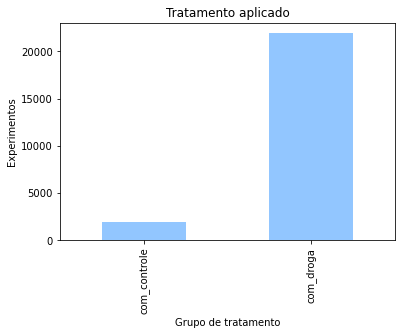

In [29]:
plt.style.use('seaborn-pastel')
dados['tratamento'].value_counts().sort_values().plot.bar()
plt.title('Tratamento aplicado')
plt.xlabel('Grupo de tratamento')
plt.ylabel('Experimentos')

#### Tempo

Text(0, 0.5, 'Quantidade de experimentos')

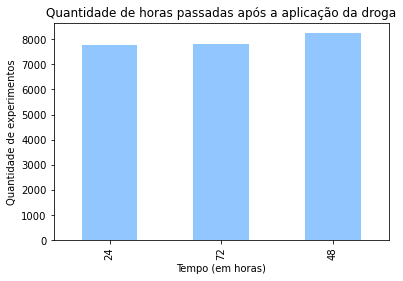

In [30]:
plt.style.use('seaborn-pastel')
dados['tempo'].value_counts().sort_values().plot.bar()
plt.title('Quantidade de horas passadas após a aplicação da droga')
plt.xlabel('Tempo (em horas)')
plt.ylabel('Quantidade de experimentos')

#### Dose

Text(0, 0.5, 'Aplicações')

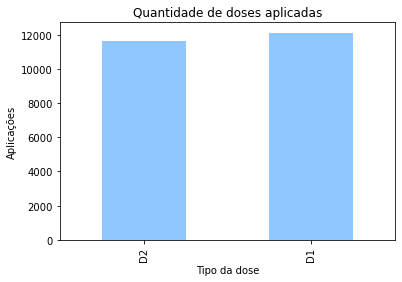

In [31]:
plt.style.use('seaborn-pastel')
dados['dose'].value_counts().sort_values().plot.bar()
plt.title('Quantidade de doses aplicadas')
plt.xlabel('Tipo da dose')
plt.ylabel('Aplicações')

### Desafio 08: Resumo do que foi aprendido com os dados

Existem 2 grupos para os tratamentos, os que receberam drogas e o grupo controle. Foram aplicadas 3.288 tipos de drogas e 1 tipo no grupo controle, provavelmente placebo. Aproximadamente 92% dos experimentos recebeu algum tipo de droga e 8% não.